In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

Total households in socio economic class approach: 254
Total households in cluster approach: 248
Common households in both approaches: 198


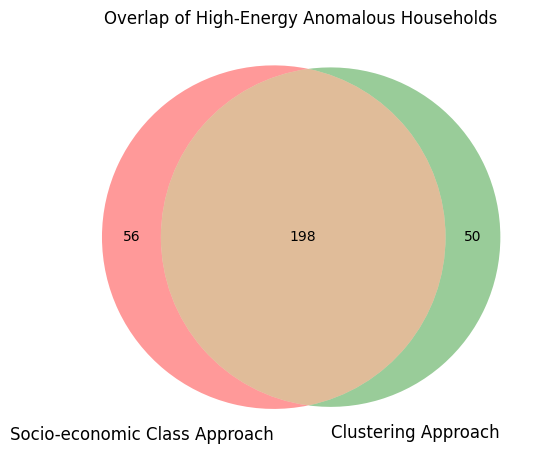

In [3]:
# -------------------------------
# 1️⃣ Load similar usage CSV
# -------------------------------
similar_csv = '/home/ranushi/test/Anomaly DetectionMethod/similar_usage_high_energy_households3.csv'
similar_df = pd.read_csv(similar_csv)
similar_df = similar_df[['household_ID', 'cluster']]

# -------------------------------
# 2️⃣ Load autoencoder CSVs (clusters 0-6) and concatenate
# -------------------------------
ae_dfs = []
for i in range(6):
    path = f'/home/ranushi/test/Anomaly DetectionMethod/anomalous_high_energy_households_cluster_2{i}.csv'
    df = pd.read_csv(path)
    df = df[['household_ID', 'cluster']]
    ae_dfs.append(df)

ae_df = pd.concat(ae_dfs, ignore_index=True)

# -------------------------------
# 3️⃣ Compute intersection and counts
# -------------------------------
set_similar = set(similar_df['household_ID'])
set_ae = set(ae_df['household_ID'])

intersection = set_similar & set_ae

only_similar = set_similar - set_ae
only_ae = set_ae - set_similar

print("Total households in socio economic class approach:", len(set_similar))
print("Total households in cluster approach:", len(set_ae))
print("Common households in both approaches:", len(intersection))

# -------------------------------
# 4️⃣ Plot Venn diagram
# -------------------------------
plt.figure(figsize=(6,6))
venn2(subsets=(len(only_similar), len(only_ae), len(intersection)),
      set_labels=('Socio-economic Class Approach', 'Clustering Approach'))
plt.title('Overlap of High-Energy Anomalous Households')
plt.show()

